# Colab Drive Mounting

In [60]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Defining Project Root

In [61]:
# use "./" instead if running this notebook locally at project root and all required resource files are downloaded.
project_root = "/content/drive/MyDrive/Classroom Materials/01418364/project/"

# Import Section

In [63]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Flatten

from sklearn.model_selection import train_test_split

import math

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, accuracy_score, precision_score

import matplotlib.pyplot as plt

%matplotlib inline

# Defining Input Parameters

In [62]:
f = open(project_root + "group-genre.txt","r")
text = f.read()
f.close()

genre_group = {}
class_name = []
group_genre = {main_genre : [genre.strip() for genre in sub_genre.split(",")] for main_genre,sub_genre in [i.split(":") for i in text.split("\n")]}

for main_genre,sub_genre in [i.split(":") for i in text.split("\n")]:
    sub_genre = [genre.strip() for genre in sub_genre.split(",")]
    main_genre = main_genre.lower()
    for genre in sub_genre:
        genre_group[genre] = main_genre
        if main_genre not in class_name:
            class_name.append(main_genre)

map_class = {main_genre : num for num,main_genre in zip(range(len(class_name)),class_name)}
class_name.remove("not_use")
map_class.pop('not_use')

21

In [6]:
classes_name = ['acoustic',
              'folk',
              'alternative/indie',
              'blues',
              'jazz',
              'classical',
              'opera',
              'club',
              'instrumental',
              'country',
              'techno',
              'electronic',
              'house',
              'hip-hop',
              'rock',
              'metal',
              'pop',
              'r&b/soul',
              'reggae',
              'latin',
              'industrial']
n_classes = len(class_name)

In [12]:
parent_dir = project_root + 'data_preprocess'
X = np.load(parent_dir + "/" + 'mfccs.npy')
y = np.load(parent_dir + "/" +  'y.npy')

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=1234)

In [14]:
def print_class_count(y_train,y_val,y_test):
    classes_train, counts_train = np.unique(y_train, return_counts=True)
    classes_val, counts_val = np.unique(y_val, return_counts=True)
    classes_test, counts_test = np.unique(y_test, return_counts=True)
    
    print(
    """
    train class: {}
    train count: {}
    val class: {}
    val count: {}
    test class: {}
    test count: {}
    """
    .format(classes_train,counts_train,classes_val,counts_val,classes_test,counts_test))

In [15]:
print_class_count(y_train, y_val, y_test)


    train class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
    train count: [432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432
 432 432 432]
    val class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
    val count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144
 144 144 144]
    test class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
    test count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144
 144 144 144]
    


In [16]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# CNN Model

## Model #1

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="valid", input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D(2, padding="same"),
    
    Conv2D(128, (3,3), activation="relu", padding="valid"),
    MaxPooling2D(2, padding="same"),
    Dropout(0.4),
    
    Conv2D(128, (3,3), activation="relu", padding="valid"),
    MaxPooling2D(2, padding="same"),
    Dropout(0.5),
    
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    Dense(n_classes, activation="softmax"),
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 1198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 599, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 597, 128)      36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 299, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 299, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 297, 128)       1

In [18]:
batch_size = 64
epochs = 20

history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    shuffle=True
)

Epoch 1/30
142/142 [==============================] - 44s 219ms/step - loss: 2.6644 - accuracy: 0.1625 - val_loss: 2.4267 - val_accuracy: 0.2103
Epoch 2/30
142/142 [==============================] - 30s 213ms/step - loss: 2.3359 - accuracy: 0.2514 - val_loss: 2.3164 - val_accuracy: 0.2616
Epoch 3/30
142/142 [==============================] - 30s 213ms/step - loss: 2.2326 - accuracy: 0.2868 - val_loss: 2.1905 - val_accuracy: 0.3019
Epoch 4/30
142/142 [==============================] - 29s 204ms/step - loss: 2.1277 - accuracy: 0.3208 - val_loss: 2.1948 - val_accuracy: 0.3082
Epoch 5/30
142/142 [==============================] - 30s 212ms/step - loss: 2.0679 - accuracy: 0.3380 - val_loss: 2.1000 - val_accuracy: 0.3446
Epoch 6/30
142/142 [==============================] - 30s 212ms/step - loss: 1.9879 - accuracy: 0.3646 - val_loss: 2.0350 - val_accuracy: 0.3489
Epoch 7/30
142/142 [==============================] - 30s 212ms/step - loss: 1.9442 - accuracy: 0.3804 - val_loss: 2.0355 - val_ac

# Plotting Loss and Accuracy Graph

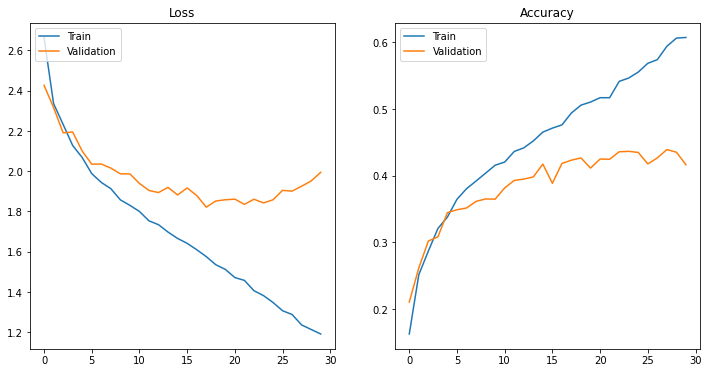

In [20]:
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(12,6)

axis[0].plot(history.history['loss'])
axis[0].plot(history.history['val_loss'])
axis[0].set_title("Loss")
axis[0].legend(['Train', 'Validation'], loc='upper left')

axis[1].plot(history.history['accuracy'])
axis[1].plot(history.history['val_accuracy'])
axis[1].set_title("Accuracy")
axis[1].legend(['Train', 'Validation'], loc='upper left')

# Testing Model

In [21]:
y_predict = model.predict(X_test)

95/95 [==============================] - 2s 16ms/step


In [23]:
y_predict_argmax = np.argmax(y_predict, 1)

In [28]:
y_test_argmax = np.argmax(y_test, 1)

# Confusion Matrix

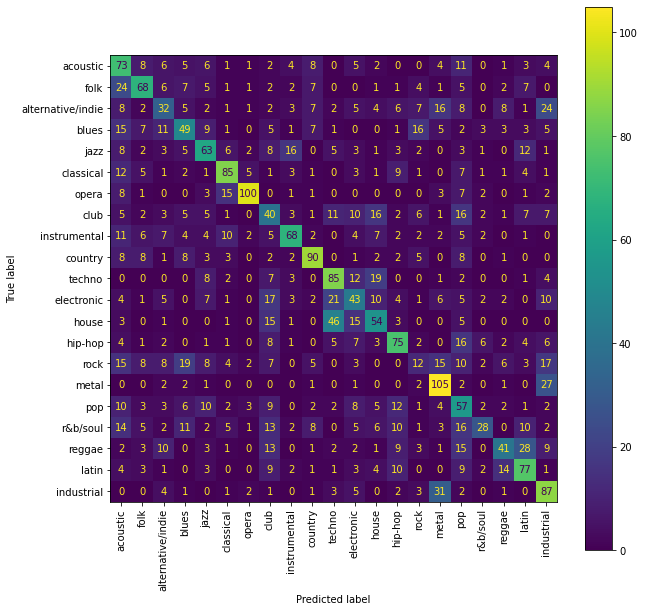

In [32]:
cm = confusion_matrix(y_test_argmax, y_predict_argmax)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay(cm, display_labels=classes_name).plot(ax=ax, xticks_rotation=90)

# Additional Metrics Illustration

In [34]:
precision = precision_score(y_test_argmax, y_predict_argmax, average=None)
recall = recall_score(y_test_argmax, y_predict_argmax, average=None)
f1 = f1_score(y_test_argmax, y_predict_argmax, average=None)

accuracy = accuracy_score(y_test_argmax, y_predict_argmax)
print("Accuracy on test set: " + str(accuracy))

Accuracy on test set: 0.44047619047619047


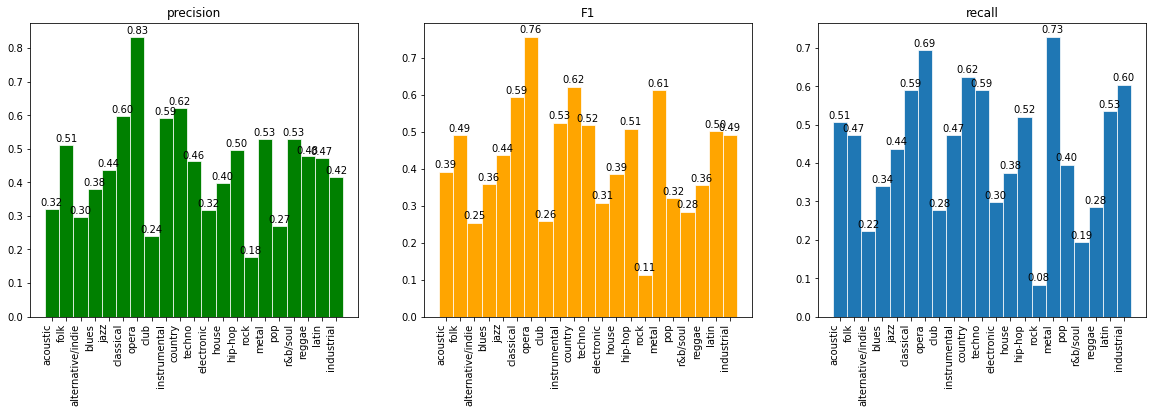

In [51]:
fig, axis = plt.subplots(1, 3)
fig.set_size_inches(20,6)
fig.autofmt_xdate(rotation=90)

axis[0].bar(classes_name, precision, width=1, edgecolor="white", linewidth=0.7, color="green")
axis[0].set_title("precision")
for i in range(len(precision)):
    axis[0].text(i - 0.8, precision[i] + 0.01, "%.2f" % precision[i])

axis[1].bar(classes_name, f1, width=1, edgecolor="white", linewidth=0.7, color="orange")
axis[1].set_title("F1")
for i in range(len(f1)):
    axis[1].text(i - 0.8, f1[i] + 0.01, "%.2f" % f1[i])

axis[2].bar(classes_name, recall, width=1, edgecolor="white", linewidth=0.7)
axis[2].set_title("recall")
for i in range(len(recall)):
    axis[2].text(i - 0.8, recall[i] + 0.01, "%.2f" % recall[i])

plt.show()